In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('biomechanical_properties_of_patients.csv')
df['class'] = [1 if each == 'Abnormal' else 0 for each in df['class']]
y = df['class'].values
x_data = df.drop(['class'], axis=1)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values #This method rescales the range of the data to [0,1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=42) #%15 to test

In [17]:
rf = RandomForestClassifier(n_estimators=100,random_state=1) #The number of trees in the forest.
rf.fit(x_train,y_train) 
print(rf.score(x_test,y_test))

0.851063829787234


In [18]:
#confusion matrix

y_pred = rf.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred) # y_test : Ground truth (correct) target values. y_pred=Estimated targets as returned by a classifier.
print(conf_matrix)



[[10  2]
 [ 5 30]]


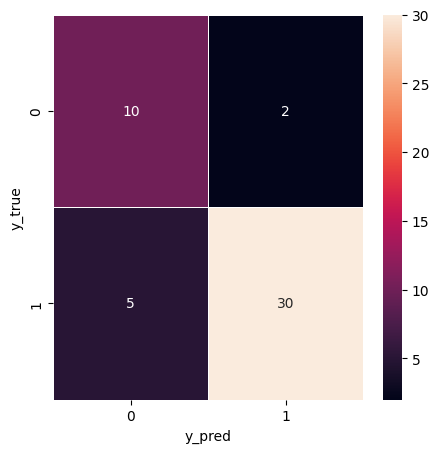

In [21]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, linewidths=0.5, linecolor='white', fmt='.0f', ax=ax)
#annot : If True, write the data value in each cell.
#fmt   : String formatting code to use when adding annotations.
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()